# Oil-Equity Correlation

In [57]:
import pandas as pd
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
API_TOKEN = os.environ.get("API_TOKEN")
import quandl
quandl.ApiConfig.api_key = API_TOKEN

In [58]:
cl = quandl.get("CHRIS/CME_QM1")
es = quandl.get("CHRIS/CME_ES1")

In [59]:
cl.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2018-09-14,68.775,69.900,67.950,69.000,0.40,68.99,18017.0,1569.0
2018-09-17,69.000,69.725,68.525,68.775,0.08,68.91,12376.0,1468.0
2018-09-18,68.800,70.425,68.525,69.750,0.94,69.85,10614.0,1216.0
2018-09-19,69.675,71.150,69.650,71.125,1.27,71.12,1220.0,1052.0
2018-09-20,70.975,71.350,70.050,70.175,0.45,70.32,13989.0,1775.0


In [60]:
es.describe()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,5378.000000,5378.000000,5378.000000,5378.000000,1133.000000,5378.000000,5.378000e+03,5.378000e+03
mean,1448.612402,1458.846411,1437.936036,1449.159174,12.077229,1449.142055,1.113573e+06,1.610987e+06
std,473.406215,473.986024,473.034465,473.867676,12.757965,473.847481,9.239922e+05,1.184029e+06
min,674.750000,694.750000,665.750000,676.000000,0.250000,676.000000,0.000000e+00,0.000000e+00
25%,1125.500000,1133.500000,1117.500000,1125.750000,3.500000,1125.750000,2.784540e+05,3.442220e+05
50%,1309.250000,1319.000000,1300.250000,1309.125000,8.500000,1309.125000,9.857395e+05,1.825976e+06
75%,1608.875000,1623.625000,1599.562500,1609.750000,17.000000,1609.750000,1.707827e+06,2.776024e+06
max,2915.750000,2935.750000,2908.250000,2935.250000,149.000000,2934.000000,6.285917e+06,3.594453e+06


In [61]:
cl.describe()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,1140.000000,1140.000000,1140.000000,1140.000000,1138.000000,1140.000000,1140.000000,1140.000000
mean,58.820395,59.634189,57.966776,58.798566,0.871129,58.800768,10897.002632,2915.357895
std,18.951353,18.907903,18.960704,18.951796,0.753953,18.952313,5131.989938,1003.358848
min,27.250000,27.475000,26.050000,27.225000,0.010000,26.210000,793.000000,1001.000000
25%,46.393750,47.262500,45.550000,46.343750,0.300000,46.337500,7328.500000,2210.750000
50%,51.925000,52.650000,50.937500,51.880000,0.670000,51.880000,10400.500000,2712.500000
75%,66.462500,67.212500,65.537500,66.450000,1.220000,66.452500,13651.000000,3453.250000
max,106.900000,107.650000,106.525000,106.910000,7.540000,106.910000,40867.000000,6996.000000


In [62]:
es_settle = es.Settle
cl_settle = cl.Settle
cl_settle.head()

Date
2014-03-05    101.45
2014-03-06    101.56
2014-03-07    102.58
2014-03-11    100.03
2014-03-12     97.99
Name: Settle, dtype: float64

Populating the interactive namespace from numpy and matplotlib


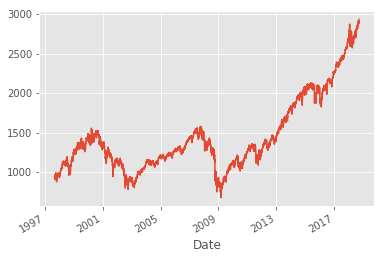

In [63]:
# use new pretty plots
matplotlib.style.use('ggplot')
# get ipython notebook to show graphs
%pylab inline

es_settle.plot()

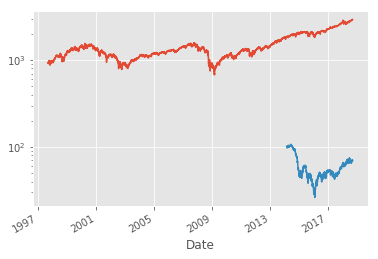

In [64]:
plt.figure()
es_settle.plot()
cl_settle.plot()
plt.yscale('log')

In [65]:
es_settle.corr(cl_settle)

-0.08497378802718977

In [66]:
df = cl_settle.to_frame('cl').join(es_settle.to_frame('es'))

In [67]:
df_ = df / df.iloc[0]

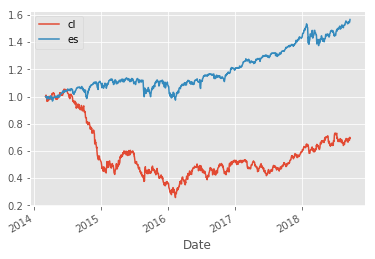

In [68]:
df_.plot()

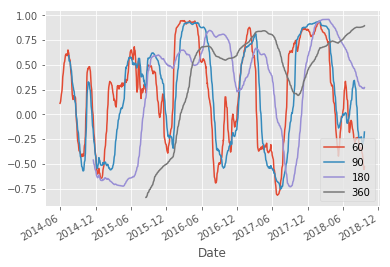

In [130]:
for i in [60,90,180,360]:
    df.es.rolling(window=i).corr(df.cl).plot(label=i)
    legend()

/Users/ubreu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ubreu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


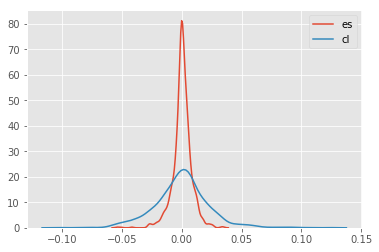

In [80]:
sns.kdeplot(df.es.pct_change())
sns.kdeplot(df.cl.pct_change())

252 = number of trading days?

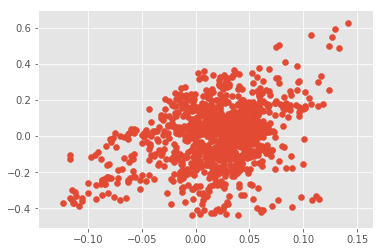

In [117]:
k = 50
plt.scatter(df.es.pct_change(k), df.cl.pct_change(k))

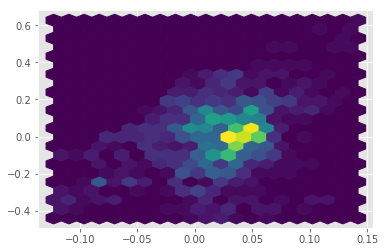

In [118]:
plt.hexbin(df.es.pct_change(k), df.cl.pct_change(k), gridsize=20)

,cl,es
count,1140.000000,1140.000000
mean,58.800768,2242.180202
std,18.952313,296.023814
min,26.210000,1811.750000
25%,46.337500,2024.750000
50%,51.880000,2114.125000
75%,66.452500,2458.812500
max,106.910000,2934.000000


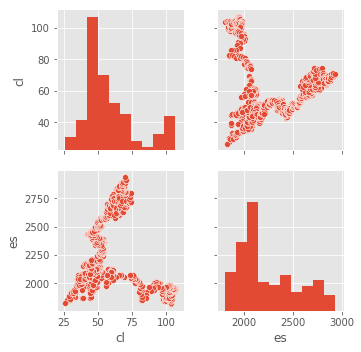

In [94]:
sns.pairplot(df)
df.describe()

In [105]:
source(df.pct_change)

In file: /Users/ubreu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py

    @Appender(_shared_docs['pct_change'] % _shared_doc_kwargs)
    def pct_change(self, periods=1, fill_method='pad', limit=None, freq=None,
                   **kwargs):
        # TODO: Not sure if above is correct - need someone to confirm.
        axis = self._get_axis_number(kwargs.pop('axis', self._stat_axis_name))
        if fill_method is None:
            data = self
        else:
            data = self.fillna(method=fill_method, limit=limit, axis=axis)

        rs = (data.div(data.shift(periods=periods, freq=freq, axis=axis,
                                  **kwargs)) - 1)
        rs = rs.reindex_like(data)
        if freq is None:
            mask = isna(com._values_from_object(data))
            np.putmask(rs.values, mask, np.nan)
        return rs



In [72]:
merged = pd.concat({'es': es_settle, 'cl': cl_settle}, axis=1)
merged[merged['cl'].isnull()].head()

,cl,es
Date,,
1997-09-09,NaN,934.0
1997-09-10,NaN,915.0
1997-09-11,NaN,908.0
1997-09-12,NaN,924.0
1997-09-15,NaN,922.0


In [73]:
merged.dropna(how='any', inplace=True)
merged[merged['cl'].isnull()]

,cl,es
Date,,


In [74]:
merged.es.rolling(window=2).corr(other=merged.cl).dropna()

Date
2014-03-06    1.000000
2014-03-07    1.000000
2014-03-11    1.000000
2014-03-12   -1.000000
2014-03-13   -1.000000
2014-03-14   -1.000000
2014-03-17   -1.000000
2014-03-18    1.000000
2014-03-19    1.000000
2014-03-20   -1.000000
2014-03-21   -1.000000
2014-03-24   -1.000000
2014-03-25   -1.000000
2014-03-26   -1.000000
2014-03-27   -1.000000
2014-03-28    1.000000
2014-03-31   -1.000000
2014-04-01   -1.000000
2014-04-02   -1.000000
2014-04-03         inf
2014-04-04   -1.000000
2014-04-07    1.000000
2014-04-08    1.000000
2014-04-09    1.000000
2014-04-10    1.000000
2014-04-11   -1.000000
2014-04-14    1.000000
2014-04-15   -1.000000
2014-04-16    1.000000
2014-04-17    1.000000
                ...   
2018-08-09    1.000000
2018-08-10   -1.000000
2018-08-13    1.000000
2018-08-14   -1.000000
2018-08-15    1.000000
2018-08-16    1.000000
2018-08-17    1.000000
2018-08-20    1.000000
2018-08-21   -1.000000
2018-08-22   -1.000000
2018-08-23    1.000000
2018-08-24    1.000000
2018-0

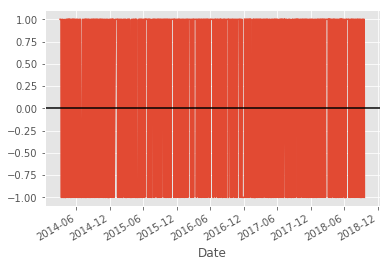

In [75]:
merged.es.rolling(window=2).corr(other=merged.cl).dropna().plot()
plt.axhline(0, color='k')

In [76]:
?merged.es.rolling(window=2).corr()

In [77]:
es_settle.autocorr()

0.9994660844982872

Text(0.5,1,'Rolling 1 yr correlation between Oil and S&P')

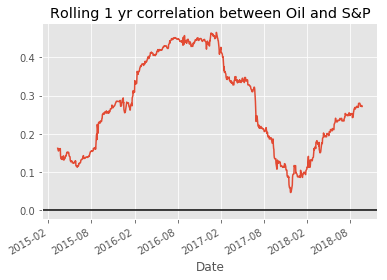

In [78]:
daily_returns = merged.pct_change()
daily_returns.es.rolling(window=252).corr(other=daily_returns.cl).dropna().plot()
plt.axhline(0, color='k')
title('Rolling 1 yr correlation between Oil and S&P')